In [1]:
import sys
sys.path.append('../code')

from SamplingWalk import *
from maxksat import *
import dynamiqs as dq
import numpy as np

import networkx as nx
import matplotlib.pyplot as plt

# Problem: Max-$k$-SAT

Given $m$ clauses $\varphi_{i}$ of $k$ literals each, one has to decide if there exists an assignment of $n$ variables that satisfies all the clauses. The combinatorial problem of finding such an assignment is called MAX-$k$-SAT. Formally, a boolean formula in conjunctive normal form of $m$ clauses reads:
$$\phi=\varphi_1\land \varphi_2\land \cdots \land \varphi_m.$$
Each clause $\varphi_{j}$ is a disjunction of $k$ literals $l_{jk}$:
$$\varphi_j = (l_{j1} \lor l_{j2} \lor \cdots \lor l_{jk}),$$
with $l_{ji} \in \{x_1,\bar{x}_1, x_2,\bar{x}_2, \cdots, x_n,\bar{x}_n\}$ where $\bar{x}_j=1-x_j$. The MAX-$k$-SAT consists of finding an assignment $x=x_1x_2\cdots x_n$ that maximizes the number of satisfied clauses. A clause is said to be satisfied if it contains at least one literal equal to 1. This criteria can be expressed as:
$$S_j(x)=1-\prod_{i=1}^k(1-l_{ji}).$$
Therefore, a clause $\varphi_j$ is satisfied with assignment $x$ if $S_j(x)=1$, and unsatisfied if $S_j(x)=0$. One aims at maximizing the number of satisfied clause, thus, the cost function to minimize is:
$$C(x)=-\sum_{j=1}^m S_j(x).$$
This problem is a polynomial of degree $k$.


## Problem generation

We generate an instance of Max-$k$-SAT of $n$ variables.

In [32]:
# Number of variables (number of qubits)
n = 8

# Number of literals per clause (degree of the problem)
k = 5

# Number of clauses
if k >= 3 and k <=15:
    m = np.floor(alpha_k[k]*n) # critical ratio
else:
    m = k*n # arbitrary choice

# We randomly generate clauses
clauses = generate_uniform_kSAT(n, m, k)

# We display the clauses
pretty_print_clauses(clauses, var_prefix='x')

(¬x5 ∨ ¬x8 ∨ x4 ∨ ¬x2 ∨ x6)
(¬x4 ∨ ¬x2 ∨ ¬x6 ∨ ¬x5 ∨ ¬x3)
(x7 ∨ x5 ∨ x1 ∨ ¬x3 ∨ x6)
(x4 ∨ ¬x5 ∨ x2 ∨ x1 ∨ ¬x8)
(x2 ∨ x5 ∨ x6 ∨ ¬x3 ∨ ¬x1)
(x3 ∨ x6 ∨ x4 ∨ ¬x2 ∨ x7)
(x5 ∨ x1 ∨ ¬x7 ∨ x6 ∨ ¬x3)
(x2 ∨ ¬x1 ∨ x8 ∨ ¬x4 ∨ x7)
(x1 ∨ x7 ∨ ¬x3 ∨ x6 ∨ ¬x2)
(x8 ∨ ¬x3 ∨ ¬x1 ∨ ¬x6 ∨ ¬x4)
(x1 ∨ ¬x8 ∨ ¬x7 ∨ ¬x3 ∨ x4)
(x5 ∨ ¬x7 ∨ ¬x2 ∨ ¬x8 ∨ x1)
(¬x1 ∨ x5 ∨ x3 ∨ ¬x4 ∨ ¬x6)
(x2 ∨ ¬x3 ∨ x1 ∨ x6 ∨ x8)
(x8 ∨ x3 ∨ x1 ∨ x7 ∨ ¬x4)
(¬x2 ∨ ¬x5 ∨ x8 ∨ ¬x1 ∨ x6)
(¬x3 ∨ x5 ∨ ¬x4 ∨ x2 ∨ x7)
(x4 ∨ ¬x6 ∨ ¬x1 ∨ x8 ∨ ¬x5)
(¬x3 ∨ ¬x5 ∨ ¬x7 ∨ ¬x4 ∨ ¬x2)
(¬x8 ∨ ¬x5 ∨ x6 ∨ ¬x3 ∨ x7)
(¬x8 ∨ ¬x5 ∨ ¬x6 ∨ ¬x2 ∨ x4)
(¬x7 ∨ x3 ∨ ¬x4 ∨ x2 ∨ ¬x1)
(¬x7 ∨ ¬x1 ∨ x6 ∨ x2 ∨ ¬x5)
(x5 ∨ ¬x7 ∨ ¬x2 ∨ ¬x8 ∨ ¬x6)
(x2 ∨ ¬x1 ∨ ¬x6 ∨ ¬x8 ∨ ¬x3)
(x7 ∨ ¬x3 ∨ x1 ∨ x6 ∨ ¬x2)
(¬x4 ∨ x8 ∨ x6 ∨ x7 ∨ ¬x2)
(¬x7 ∨ ¬x3 ∨ ¬x1 ∨ x4 ∨ ¬x5)
(x5 ∨ x6 ∨ x8 ∨ x3 ∨ x2)
(¬x8 ∨ ¬x4 ∨ x5 ∨ x6 ∨ x2)
(x1 ∨ x3 ∨ x4 ∨ ¬x6 ∨ ¬x5)
(¬x3 ∨ x7 ∨ ¬x6 ∨ x5 ∨ x2)
(x8 ∨ ¬x4 ∨ ¬x3 ∨ x1 ∨ x5)
(¬x6 ∨ x3 ∨ x8 ∨ x7 ∨ ¬x1)
(¬x2 ∨ x6 ∨ x8 ∨ x4 ∨ ¬x7)
(¬x2 ∨ x4 ∨ ¬x7 ∨ ¬x8 ∨ ¬x1)
(x1 ∨ x

We first use a brute-force approach to compute the solutions of the problem to compare with the results obtained with SamBa GQW.

In [33]:
# Compute cost for all bitstrings
cost_values = []
for i in range(2**n):
    bitstr = int_to_bitstring(i,n)         # convert integer to binary vector
    cost_val = evaluate_maxk_sat(bitstr,clauses)
    cost_values.append(cost_val)

# Normalize to [0,1] (1 = minimum cost, 0 = maximum cost)
cost_values = np.array(cost_values)
min_val = cost_values.min()
max_val = cost_values.max()
normalized_values = 1 - (cost_values - min_val) / (max_val - min_val)

# Create the dictionary: each key is a computational basis state (integer version) and the value is its quality (1 for optimal solutions, 0 for worst)
cost_quality_dict = {i: normalized_values[i] for i in range(2**n)}

We visualize the cost function on the solution space ($n$-dimensional hypercube) where the color of the vertices depends on their quality, which is 1 for optimal solutions and 0 for worst.

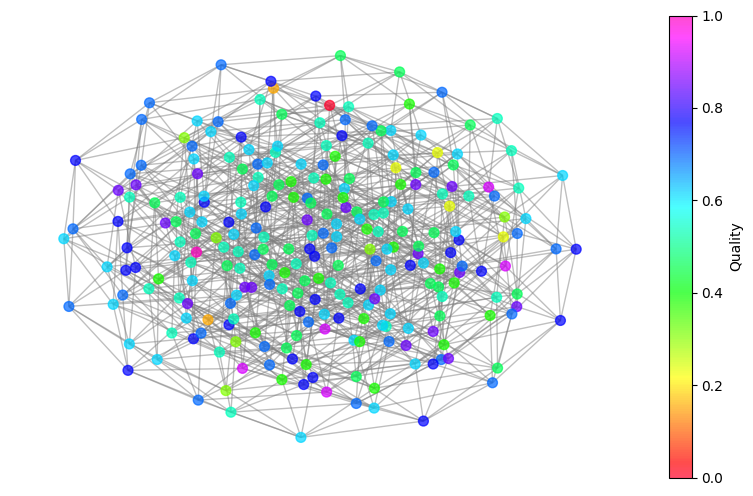

In [34]:
# Solution graph (each node of this hypercube corresponds to a computational basis state, i.e. a decision)
mixer_graph = nx.hypercube_graph(n) # hypercube since we use X-mixer for this problem

# Map vertex -> value
node_colors = [cost_quality_dict[int("".join(map(str, node)), 2)] for node in mixer_graph.nodes()]

cmap = plt.cm.gist_rainbow

# Create figure + axes explicitly
fig, ax = plt.subplots(figsize=(10, 6))

# Layout (spring or shell works well)
pos = nx.spring_layout(mixer_graph, seed=42)

# Draw graph
nodes = nx.draw_networkx_nodes(
    mixer_graph, pos, node_color=node_colors, cmap=cmap,
    vmin=0, vmax=1, node_size=50, ax=ax, alpha=0.7
)

nx.draw_networkx_edges(
    mixer_graph, pos,
    edge_color="gray",   # set all edges to gray
    alpha=0.5,
    ax=ax
)

# Add colorbar linked to nodes
cbar = fig.colorbar(nodes, ax=ax)
cbar.set_label("Quality")

ax.axis("off")
plt.show()

## SamBa GQW: classical part

We create an instance of SamBa-GQW for Max-$k$-SAT with $X$-mixer, then we perform the sampling protocol and compute the mean of the sampled energy gaps.

In [ ]:
# Creation of instance of SamBa GQW

use_qutip = False # QuTip or Dynamiqs

if use_qutip:
    mixer = nx.adjacency_matrix(nx.hypercube_graph(n)).todense() # dense representation
else:
    mixer = dq.sparsedia_from_dict(hypercube_adjacency_sparse_final(n)) # sparse representation

samba_gqw = SamplingWalk(n,
                      cost=evaluate_maxk_sat, # Max-k-SAT cost function
                      mixer=mixer, # Mixer (here n-dimensional hypercube)
                      use_qutip=use_qutip, # QuTip or Dynamiqs
                      use_density_matrix=False, # State vector representation
                      convert_input_cost_fun=int_to_bitstring, # Function to convert integer to binary vectors
                      cost_kwargs={'clauses':clauses} # Additional inputs of the cost function
            )

# Sampling protocol
q = n**2 # Quadratic sampling
neighbors_fun = hamming_neighbors # X-mixer (hypercube) neighboring function
samba_gqw.sampling_protocol(q=q, neighbors_fun=neighbors_fun)
samba_gqw.compute_mean_gaps()

We visualize the vertices (states) sampled on the solution graph.

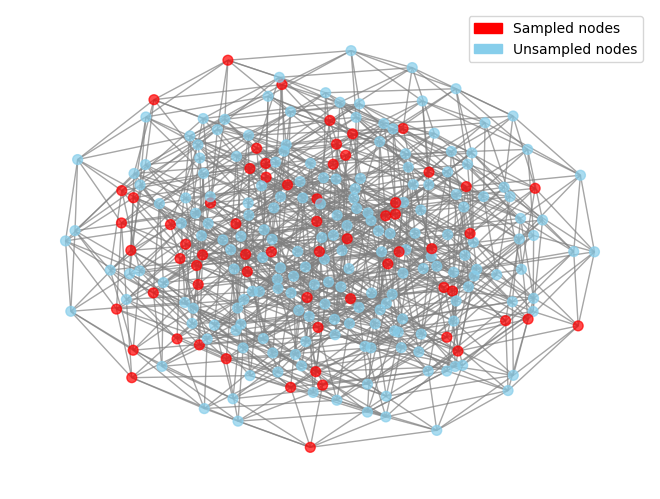

In [36]:
import matplotlib.patches as mpatches

# Map tuple nodes → integers
node_int_map = {node: int("".join(map(str, node)), 2) for node in mixer_graph.nodes()}

# Choose special nodes to highlight (integers from your sampler)
sampled_nodes = samba_gqw.sampled_states  # already integers

# Assign colors: red for special, skyblue otherwise
node_colors = [
    "red" if node_int_map[node] in sampled_nodes else "skyblue"
    for node in mixer_graph.nodes()
]

# Draw without labels
nx.draw(
    mixer_graph, pos,
    with_labels=False,
    node_color=node_colors,
    node_size=50,
    edge_color="gray", alpha=0.7
)
# Création de la légende
red_patch = mpatches.Patch(color='red', label='Sampled nodes')
blue_patch = mpatches.Patch(color='skyblue', label='Unsampled nodes')
plt.legend(handles=[red_patch, blue_patch])

plt.show()

### Interpolation of $\Gamma$

We construct the time-dependent hopping rate.

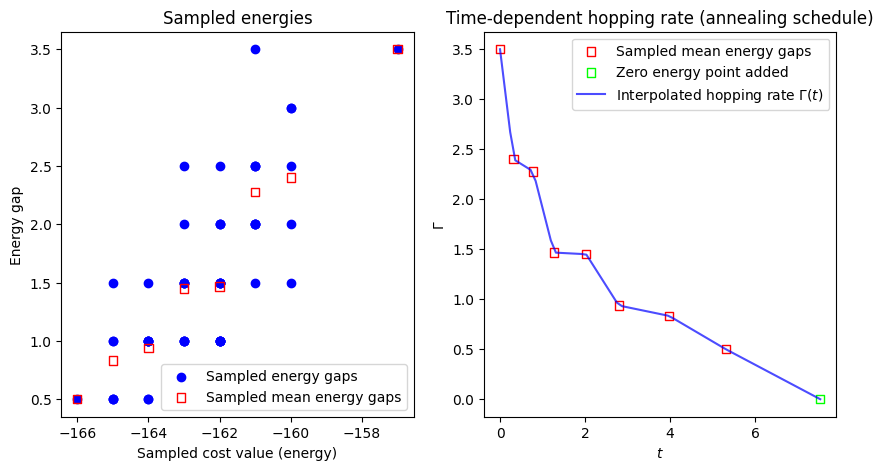

In [37]:
# Interpolation
samba_gqw.interpolate(dt=n**2)

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# --- First plot ---
x_values = [val[0] for val in samba_gqw.sample.values()]
y_values = [val[1]/samba_gqw.local_mixer_gap for val in samba_gqw.sample.values()]

x_temp = samba_gqw.energies.copy()
new_temp = samba_gqw.np.concatenate([samba_gqw.np.array([samba_gqw.energies[0]]), x_temp])

# Scatter des cercles bleus (points "Sampled energy gaps")
axes[0].scatter(x_values, y_values, color='blue', label='Sampled energy gaps')

# Scatter des carrés rouges (hollow)
axes[0].scatter(samba_gqw.energies, samba_gqw.mean_gaps[::-1][1:], marker='s', facecolors='none', edgecolors='red', label="Sampled mean energy gaps")

axes[0].set_xlabel('Sampled cost value (energy)')
axes[0].set_ylabel('Energy gap')
axes[0].set_title('Sampled energies')
axes[0].legend()

# --- Second plot ---
# Scatter all points except last with hollow red squares
axes[1].scatter(samba_gqw.gap_dt[:-1], samba_gqw.mean_gaps[:-1], marker='s', facecolors='none', edgecolors='red', label='Sampled mean energy gaps')

# Scatter the last point in green (hollow)
axes[1].scatter(samba_gqw.gap_dt[-1:], samba_gqw.mean_gaps[-1:], marker='s', facecolors='none', edgecolors='lime', label='Zero energy point added')

# Plot interpolated hopping
axes[1].plot(samba_gqw.t_list, samba_gqw.hopping, color='blue', linestyle='-', linewidth=1.5, alpha=0.7, label="Interpolated hopping rate $\Gamma(t)$")

axes[1].set_xlabel('$t$')
axes[1].set_ylabel('$\Gamma$')
axes[1].set_title('Time-dependent hopping rate (annealing schedule)')
axes[1].legend()

plt.show()


## SamBa GQW: quantum part
We now solve the problem using SamBa GQW with the Hamiltonian evolution (continuous version).

### Hamiltonian evolution

In [38]:
# We perform the Hamiltonian evolution
results = samba_gqw.evolve()

# We extract the results
if samba_gqw.use_qutip:
    results_array = np.array([state.full() for state in results.states]) # array of quantum states
    times = results.times # values of evaluated time
else:
    results_array = np.array([state.to_numpy() for state in results.states]) # array of quantum states
    times = results.tsave # values of evaluated time

#### Results visualization

We compute several metrics for analysis purposes.

In [39]:
from performance_metrics import *

rank_dict = rank_solutions_by_quality(cost_quality_dict)
prob_over_time = [(np.abs(state)**2).reshape(-1) for state in results_array]
distribution_quality_over_time = [distribution_quality(pr,list(cost_quality_dict.values())) for pr in prob_over_time]
probabilities_per_rank_over_time = [[np.sum(pr[rank_dict[r]]) for pr in prob_over_time] for r in list(rank_dict.keys())]
patricipation_ratio_over_time = 1 / (2**n * np.sum(np.vstack(prob_over_time)**2, axis=1))

We first plot the several metrics over time.

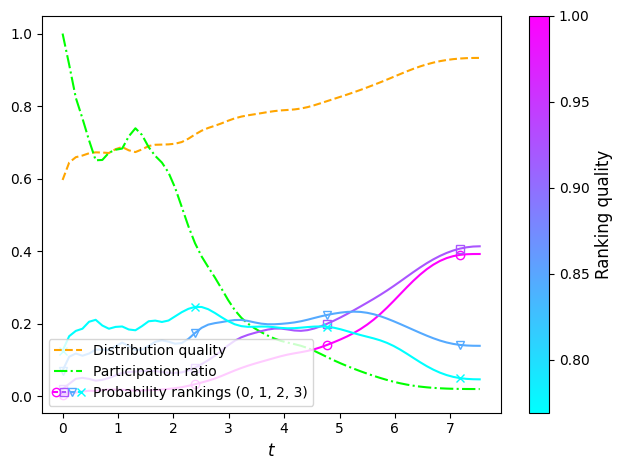

In [40]:
# We select the rankings for which we want to display the measurement probabilities over time
rank_to_display = [0,1,2,3]

# We plot several metrics over time
plot_performance(
    distribution_quality_over_time,
    patricipation_ratio_over_time,
    probabilities_per_rank_over_time,
    times,
    [cost_quality_dict[rank_dict[i][0]] for i in list(rank_dict.keys())],
    rank_list=rank_to_display,
    rank_dict=rank_dict,
    pourcentage=0,
    marker_list=None,
    markevery=20,
    markersize=6,
    show_colorbar=True,
    show_legend=True
)

We then plot the initial and final ranking distributions.

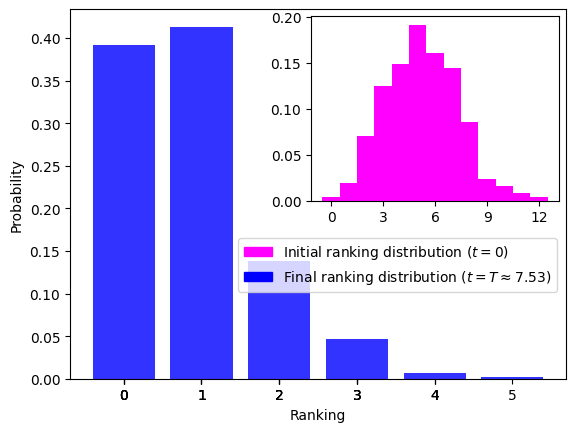

In [41]:
prob_per_rank_init = np.array([probabilities_per_rank_over_time[r][0] for r in list(rank_dict.keys())])
prob_per_rank_final = np.array([probabilities_per_rank_over_time[r][-1] for r in list(rank_dict.keys())])

plot_ranking_distribution(prob_per_rank_final=prob_per_rank_final,
                        prob_per_rank_init=prob_per_rank_init,
                        threshold=1e-3,
                        num_ticks=20,
                        inset_plot_size=50,
                        inset_plot_label='Initial ranking distribution ($t=0$)',
                        main_plot_label=rf'Final ranking distribution ($t=T\approx {round(times[-1],2)}$)',
                        save=False,
                        figname='ranking_distribution.png')

We simulate measurements in the computational basis and we select the best found approximation to be the **measured** state with lowest cost.

The best found assignment is x=117 (01110101) of ranking r=0


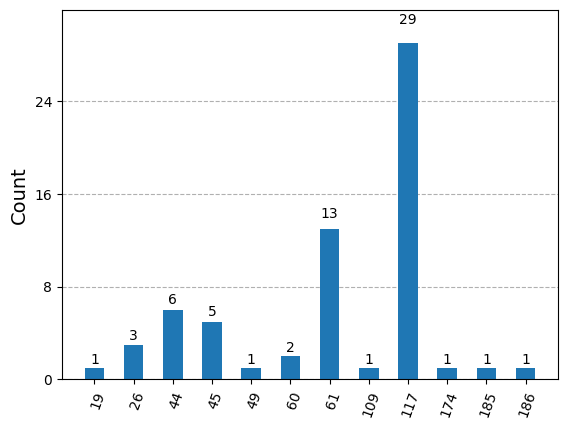

In [42]:
from collections import Counter
from qiskit.visualization import plot_histogram

def sample_measurements(probabilities, k, seed=None):
    """
    Simulate k measurements from a probability distribution.
    
    Args:
        probabilities (array-like): probability vector that sums to 1
        k (int): number of measurements
        seed (int, optional): random seed for reproducibility
    
    Returns:
        dict: {index: count of times measured}
    """
    rng = np.random.default_rng(seed)
    n = len(probabilities)
    outcomes = rng.choice(np.arange(n), size=k, p=probabilities)
    counts = dict(Counter(outcomes))
    return counts

# Number of measurements
n_shots = n**2

# Simulate the measurements
res = sample_measurements(prob_over_time[-1], n_shots, seed=42)

# Print the best found assignment
best_found_assigment = min(res.keys(), key=lambda b: evaluate_maxk_sat(int_to_bitstring(b,n),clauses))
print(f"The best found assignment is x={best_found_assigment} "
      f"({format(best_found_assigment, f'0{n}b')}) "
      f"of ranking r={next((key for key, values in rank_dict.items() if best_found_assigment in values))}")

# Plot the results of the measurements
plot_histogram(res)

We check how many clauses are satisfied by the best found approximation $\tilde{x}$. Note that if all clauses are satisfied, i.e. $\lvert C(\tilde{x})\rvert=m$, the answer to the related decision problem $k$-SAT (for this instance) is **YES**.

In [43]:
print(f'Number of satisfied clauses with the best found assignment: {-evaluate_maxk_sat(int_to_bitstring(best_found_assigment,n),clauses)}')
print(f'Total number of clauses: {int(m)}')

Number of satisfied clauses with the best found assignment: 168
Total number of clauses: 168
